In [1]:
from vrppd_parameters import Parameters
from vrppd_solution import Solution
from vrppd_solver import optimize
from random_greedy_courier_heuristic import random_greedy_courier_heuristic
import numba
from numba.experimental import jitclass
import time
import numpy as np
import is_feasible
import read_data
import matplotlib.pyplot as plt

print(dir(read_data))
all_instances = read_data.read_all_instances_from_folder('Challenge/training_data_small')
test_parameters = Parameters(all_instances[0])

solver_settings = {
    'time_limit': 5
}

time_start = time.time()
best_solution = optimize(test_parameters, solver_settings=solver_settings)
time_end = time.time()

print(f'Best solution found: {best_solution.total_delivery_time} with time {time_end - time_start} seconds')


['Courier', 'Delivery', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'csv', 'load_couriers_from_csv', 'load_deliveries_from_csv', 'load_travel_time_from_csv', 'os', 'process_all_instances', 'process_instance_folder', 'read_all_instances_from_folder']
Processing instance: 1c4f92e6-d84c-44ec-92d9-44485f5deec9
Processing instance: 79d64424-1935-4829-b452-d6c926b1ef70
Processing instance: 0b220d8f-ba16-4848-86ef-b446ef436fce
Processing instance: 1ad01be7-2897-4c4f-83f0-cfa7953cc8b8
Best solution found: 575 with time 5.008954763412476 seconds


[[0, 42, 43, 36, 62], [1, 58, 72], [2, 36, 37], [3, 40, 41], [4, 47, 48], [5, 30, 31], [6, 70, 71], [7, 36, 39], [8], [9, 60, 61], [10, 53, 54], [11, 44, 45], [12, 44, 57, 63, 64], [13, 51, 52], [14], [15, 68, 69], [16, 38, 39], [17, 66, 67], [18, 58, 59], [19, 34, 35], [20, 63, 65], [21, 34, 46], [22, 49, 50], [23, 32, 33], [24, 55, 56], [25], [26], [27], [28], [29]]
[(1, 43), (43, 44), (44, 37), (37, 63), (2, 59), (59, 73), (3, 37), (37, 38), (4, 41), (41, 42), (5, 48), (48, 49), (6, 31), (31, 32), (7, 71), (71, 72), (8, 37), (37, 40), (10, 61), (61, 62), (11, 54), (54, 55), (12, 45), (45, 46), (13, 45), (45, 58), (58, 64), (64, 65), (14, 52), (52, 53), (16, 69), (69, 70), (17, 39), (39, 40), (18, 67), (67, 68), (19, 59), (59, 60), (20, 35), (35, 36), (21, 64), (64, 66), (22, 35), (35, 47), (23, 50), (50, 51), (24, 33), (33, 34), (25, 56), (56, 57)]


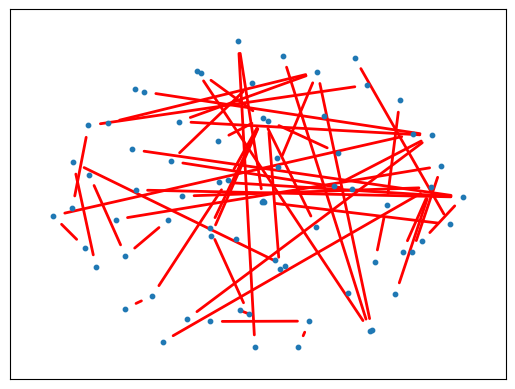

In [2]:
from route_list import route_list
import networkx as nx

#print(best_solution.routing_plan)
#print(route_list(test_parameters,best_solution))

distance_matrix = test_parameters.location_distance_matrix


# Create a networkx graph
G = nx.Graph()

# Add nodes to the graph
for location in range(1, test_parameters.location_count + 1):
    G.add_node(location)

# Add edges to the graph with arc lengths from distance_matrix
for i in range(1, test_parameters.location_count + 1):
    for j in range(i + 1, test_parameters.location_count + 1):
        distance = distance_matrix[i-1][j-1]
        G.add_edge(i, j, weight=distance)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=10)

# Draw the routes specified in route_list
print(route_list(test_parameters, best_solution))
edges = []
for route in route_list(test_parameters, best_solution):
    if len(route) > 1:
        #print(route)
        for i in range(len(route)-1):
            #print((route[i], route[i + 1]))
            edges.append((route[i]+1, route[i + 1]+1))

#print(edges)

# Check if the nodes in the edges list exist in the graph
print(edges)
#edges = [(u, v) for u, v in edges if u in G.nodes and v in G.nodes]

nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2, arrows=True, arrowsize=100)  

# Show the graph
plt.show()




In [5]:
def catalan_combinations(n):
    def backtrack(s=[], open=0, close=0):
        if len(s) == 2 * n:
            result.append(s)
            return
        if open < n:
            backtrack(s + [0], open + 1, close)
        if close < open:
            backtrack(s + [1], open, close + 1)

    result = []
    backtrack()

    for i in range(len(result)):
        open_bracket_count = 1
        closed_bracket_count = 1
        for j in range(len(result[i])):
            if result[i][j] == 0:
                result[i][j] = open_bracket_count
                open_bracket_count += 1
            else:
                result[i][j] = -closed_bracket_count
                closed_bracket_count += 1
    return result

catalan_combinations_list = np.array([catalan_combinations(i) for i in range(0, 6)], dtype=object)

# Example usage

catalan_combinations_list = np.array([catalan_combinations(i) for i in range(0, 6)], dtype=object)
for catalan_combination in catalan_combinations_list:
    print(catalan_combination)



[[]]
[[1, -1]]
[[1, 2, -1, -2], [1, -1, 2, -2]]
[[1, 2, 3, -1, -2, -3], [1, 2, -1, 3, -2, -3], [1, 2, -1, -2, 3, -3], [1, -1, 2, 3, -2, -3], [1, -1, 2, -2, 3, -3]]
[[1, 2, 3, 4, -1, -2, -3, -4], [1, 2, 3, -1, 4, -2, -3, -4], [1, 2, 3, -1, -2, 4, -3, -4], [1, 2, 3, -1, -2, -3, 4, -4], [1, 2, -1, 3, 4, -2, -3, -4], [1, 2, -1, 3, -2, 4, -3, -4], [1, 2, -1, 3, -2, -3, 4, -4], [1, 2, -1, -2, 3, 4, -3, -4], [1, 2, -1, -2, 3, -3, 4, -4], [1, -1, 2, 3, 4, -2, -3, -4], [1, -1, 2, 3, -2, 4, -3, -4], [1, -1, 2, 3, -2, -3, 4, -4], [1, -1, 2, -2, 3, 4, -3, -4], [1, -1, 2, -2, 3, -3, 4, -4]]
[[1, 2, 3, 4, 5, -1, -2, -3, -4, -5], [1, 2, 3, 4, -1, 5, -2, -3, -4, -5], [1, 2, 3, 4, -1, -2, 5, -3, -4, -5], [1, 2, 3, 4, -1, -2, -3, 5, -4, -5], [1, 2, 3, 4, -1, -2, -3, -4, 5, -5], [1, 2, 3, -1, 4, 5, -2, -3, -4, -5], [1, 2, 3, -1, 4, -2, 5, -3, -4, -5], [1, 2, 3, -1, 4, -2, -3, 5, -4, -5], [1, 2, 3, -1, 4, -2, -3, -4, 5, -5], [1, 2, 3, -1, -2, 4, 5, -3, -4, -5], [1, 2, 3, -1, -2, 4, -3, 5, -4, -5], [1, 2, 

In [14]:
import itertools
import numpy as np

test_prod = itertools.product([[0, 1], [2, 3]], [[0, 1], [2, 3]])
for e in test_prod:
    print(e)


([0, 1], [0, 1])
([0, 1], [2, 3])
([2, 3], [0, 1])
([2, 3], [2, 3])


In [15]:

arr = np.array([1,2,3])
arr2 = arr
arr2[0] = 5
print(arr)

[5 2 3]
